In [1]:
%pylab inline
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rcParams['xtick.labelsize'] = 20
import seaborn as sb
sb.set(font_scale=2.0)

Populating the interactive namespace from numpy and matplotlib


# Chapter 2

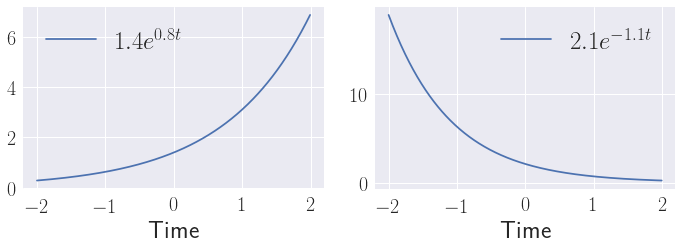

In [25]:
t = np.arange(-2.0, 2.0, 0.01)
fig = figure(figsize=(10, 4))
subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
A, b = 1.4, 0.8 
plot(t, A * np.exp(b * t), label="${0}e^{{ {1}t }}$".format(A, b))
xlabel('Time', fontsize=25)
legend(prop={'size': 25})

subplot2grid((1,2), (0,1), rowspan=1, colspan=1)
A, b = 2.1, -1.1
plot(t, A * np.exp(b * t), label="${0}e^{{ {1}t }}$".format(A, b))
xlabel('Time', fontsize=25)
legend(prop={'size': 25});
tight_layout();
fig.savefig("ch2-expsig.png", format="png", dpi=200);

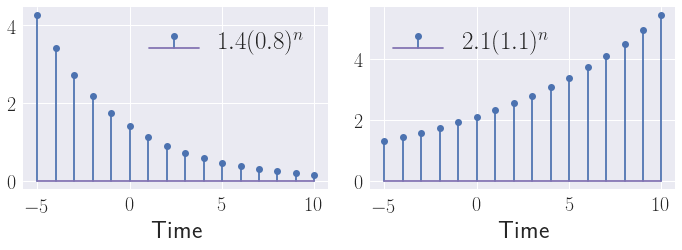

In [27]:
n = np.arange(-5.0, 11.0, 1.0)
fig = figure(figsize=(10, 4))
subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
A, b = 1.4, 0.8
stem(n, A * np.power(b, n), label="${0} ({1})^n$".format(A, b))
xlabel('Time', fontsize=25)
legend(prop={'size': 25})

subplot2grid((1,2), (0,1), rowspan=1, colspan=1)
A, b = 2.1, 1.1
stem(n, A * np.power(b, n), label="${0}({1})^ n$".format(A, b))
xlabel('Time', fontsize=25)
legend(prop={'size': 25});
tight_layout();
fig.savefig("ch2-discexpsig.png", format="png", dpi=200);

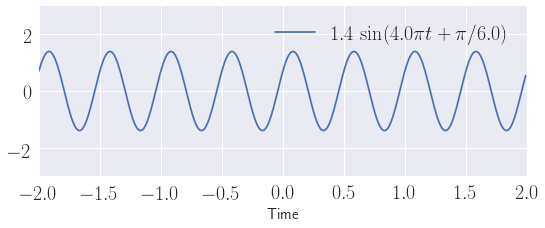

In [30]:
t = np.arange(-2.0, 2.0, 0.01)
fig = figure(figsize=(8, 3.7))
# sinuisoid parameters
A = 1.4
f = 2. # omega = 2 * pi * f
p = 6. # phi = pi / p

lbl_txt = "${0}\,\sin({1}\pi t + \pi / {2})$"
plot(t, A * np.sin(2 * np.pi * f * t + np.pi / p), 
     label=lbl_txt.format(A, 2*f, p))
xlabel('Time', fontsize=15)
ylim(-3, 3)
xlim(-2, 2)
legend(prop={'size':20});
tight_layout();
fig.savefig("ch2-sine.png", format="png", dpi=200);

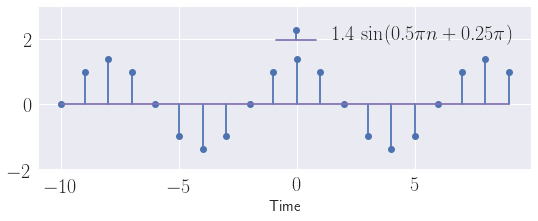

In [46]:
n = np.arange(-10.0, 10.0, 1.0)
fig = figure(figsize=(8, 3.7))
# sinuisoid parameters
A = 1.4
f = 0.25 * np.pi
p = 0.5 * np.pi

lbl_txt = "${0}\,\sin(0.5\pi n + 0.25\pi)$"
stem(n, A * np.sin(f * n + p), 
     label=lbl_txt.format(A, 2*f, p))
xlabel('Time', fontsize=15)
ylim(-2, 3)
# xlim(-2, 2)
legend(prop={'size':20});
tight_layout();
fig.savefig("ch2-discsine.png", format="png", dpi=200);

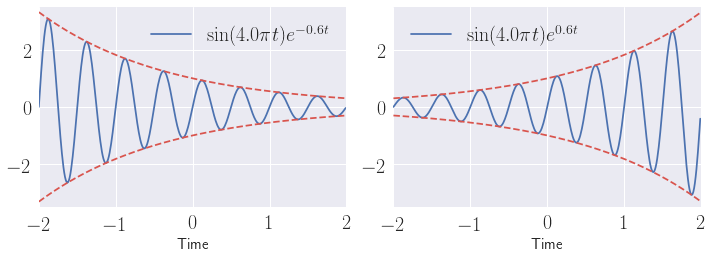

In [17]:
t = np.arange(-2.0, 2.0, 0.01)
fig = figure(figsize=(10, 3.7))

subplot(121)
# sinuisoid parameters
f = 2. # omega = 2 * pi * f
b = -0.6

lbl_txt = "$\sin({0}\pi t)e^{{{1}t}}$"
plot(t, np.sin(2 * np.pi * f * t) * np.exp(b * t), 
     label=lbl_txt.format(2 * f, b))
plot(t, np.exp(b * t), '--', color=sb.xkcd_rgb["pale red"])
plot(t, -np.exp(b * t), '--', color=sb.xkcd_rgb["pale red"])
xlabel('Time', fontsize=15)
ylim(-3.5, 3.5)
xlim(-2, 2)
legend(prop={'size':20});
subplot(122)
# sinuisoid parameters
b = 0.6
lbl_txt = "$\sin({0}\pi t)e^{{{1}t}}$"
plot(t, np.sin(2 * np.pi * f * t) * np.exp(b * t), 
     label=lbl_txt.format(2 * f, b))
plot(t, np.exp(b * t), '--', color=sb.xkcd_rgb["pale red"])
plot(t, -np.exp(b * t), '--', color=sb.xkcd_rgb["pale red"])
xlabel('Time', fontsize=15)
ylim(-3.5, 3.5)
xlim(-2, 2)
legend(prop={'size':20});
tight_layout();
fig.savefig("ch2-expsine.png", format="png", dpi=200);

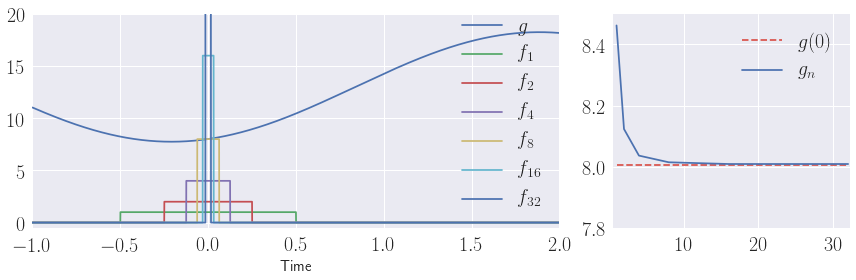

In [45]:
# Ordinary function.
def g_value(t):
    return 13.0 + 5.25 * np.sin(1.5 * t - np.pi/2.5)

# Impulse function sequence
def f_value(t, n):
    return n if (t <= (1./(2*n)) and t >= -1./(2*n)) else 0.

dt = 0.0001
time = np.arange(-1., 2.0, dt)
g = [g_value(t) for t in time]
g_0 = np.array(g)[(np.abs(time) < (dt / 2))]
f_1 = [f_value(t, 1) for t in time]
f_2 = [f_value(t, 2) for t in time]
f_4 = [f_value(t, 4) for t in time]
f_8 = [f_value(t, 8) for t in time]
f_16 = [f_value(t, 16) for t in time]
f_32 = [f_value(t, 32) for t in time]


# Sifting property
g_1 = np.sum(np.array(g) * np.array(f_1)) * dt
g_2 = np.sum(np.array(g) * np.array(f_2)) * dt
g_4 = np.sum(np.array(g) * np.array(f_4)) * dt
g_8 = np.sum(np.array(g) * np.array(f_8)) * dt
g_16 = np.sum(np.array(g) * np.array(f_16)) * dt
g_32 = np.sum(np.array(g) * np.array(f_16)) * dt

fig = figure(figsize=(12, 4))
subplot2grid((1, 3), (0, 0), rowspan=1, colspan=2)
plot(time, g, label="$g$")
plot(time, f_1, label="$f_{1}$")
plot(time, f_2, label="$f_{2}$")
plot(time, f_4, label="$f_{4}$")
plot(time, f_8, label="$f_{8}$")
plot(time, f_16, label="$f_{16}$")
plot(time, f_32, label="$f_{32}$")
xlabel('Time', fontsize=15)
ylim(-0.5, 20)
xlim(-1, 2)
legend(prop={'size':20});
subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)
plot([1, 32], [g_0, g_0], '--', color=sb.xkcd_rgb["pale red"], label="$g(0)$")
plot([1, 2, 4, 8, 16, 32], [g_1, g_2, g_4, g_8, g_16, g_32], label="$g_{n}$")
xlim(0.5, 32.2)
ylim(7.8, 8.5)
legend(prop={'size':20});
tight_layout();
fig.savefig("ch2-impulsesift.png", format="png", dpi=200);

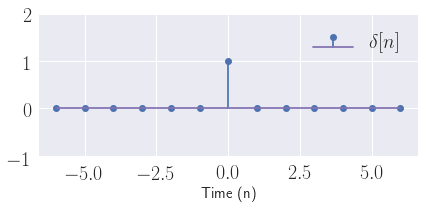

In [5]:
n = np.arange(-6.0, 7.0, 1.0)
fig = figure(figsize=(6, 3))

lbl_txt = "$\delta[n]$"
stem(n, 1.0 * (n == 0), label=lbl_txt)
xlabel('Time (n)', fontsize=15)
ylim(-1, 2)
legend(prop={'size':20});
tight_layout();
fig.savefig("ch2-impulse-disc.svg", format="svg");

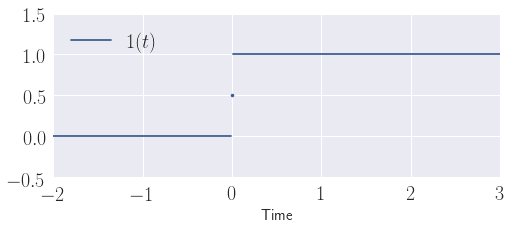

In [15]:
dt= 0.01
t = np.arange(-2.0, 4.0, dt)
fig = figure(figsize=(8, 3))
lbl_txt = "$1(t)$"
u = [1.0 if _t > (dt / 2.) else 
     (0.0 if (_t < -dt / 2.) else np.nan)
     for _t in t]
plot(t, u, color=sb.xkcd_rgb["denim blue"], label=lbl_txt)
plot([0], [0.5], '.', color=sb.xkcd_rgb["denim blue"])
xlabel('Time', fontsize=15)
ylim(-0.5, 1.5)
xlim(-2, 3)
legend(prop={'size':20});
fig.savefig("ch2-step-cont.svg", format="svg");

/home/siva82kb/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'color'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


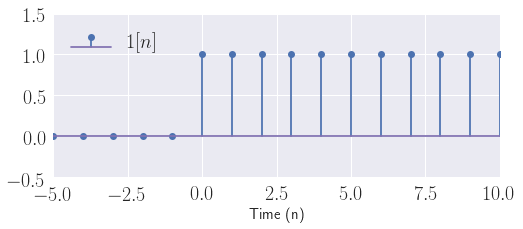

In [19]:
t = np.arange(-5.0, 11.0, 1.0)
fig = figure(figsize=(8, 3))
lbl_txt = "$1[n]$"
# u = [1.0 if _t >= 0 else  0.0 for _t in t]
stem(t, 1.0 * (t >= 0.0), color=sb.xkcd_rgb["denim blue"], label=lbl_txt)
xlabel('Time (n)', fontsize=15)
ylim(-0.5, 1.5)
xlim(-5, 10)
legend(prop={'size':20});
fig.savefig("ch2-step-disc.svg", format="svg");